<a href="https://colab.research.google.com/github/yesung05/2025-1-myclass-BDA/blob/main/inclass/13w_A_mon_0609_easy_ch10_text_mining_BTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13주 BTS 댓글 워드 클라우드

In [62]:
!pip install koreanize-matplotlib

In [63]:
import koreanize_matplotlib

In [64]:
!find / -name NanumGothic.ttf

/usr/local/lib/python3.11/dist-packages/koreanize_matplotlib/fonts/NanumGothic.ttf
find: ‘/proc/73/task/73/net’: Invalid argument
find: ‘/proc/73/net’: Invalid argument


In [65]:
FONT_PATH = '/usr/local/lib/python3.11/dist-packages/koreanize_matplotlib/fonts/NanumGothic.ttf'

In [66]:
!pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [67]:
!pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: /usr/local/lib/python3.11/dist-packages
Requires: JPype1, lxml, numpy
Required-by: 


In [68]:
!pip install konlpy

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import seaborn as sns

In [70]:
!git clone https://github.com/ai7dnn/data

fatal: destination path 'data' already exists and is not an empty directory.


In [71]:
df = pd.read_csv('data/news_comment_BTS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [72]:
df.sample(5)

,reg_time,reply,press,title,url
361,2020-09-01 19:04:58,세상 바꼈다 쟤네들 군대 안가도 아무 문제없다고 본다. 참고로 난 철원군 갈말읍에서...,문화일보,BTS ‘다이너마이트’ 터졌다… 한국가수 첫 빌보드싱글 1위,https://news.naver.com/main/read.nhn?mode=LSD&...
914,2020-09-01 03:05:33,이제야 인정해주네 그저 빛 ..,경향신문,"BTS, 한국 가수 최초 미 빌보드 싱글차트 1위···‘다이너마이트’급 대기록",https://news.naver.com/main/read.nhn?mode=LSD&...
874,2020-09-01 03:07:44,정밀 축하해요 방탄 ㅠㅠㅠㅜㅜㅜㅠㅠㅠㅠㅠ 진짜 진짜 고생길 접고 꽃길만 걸어요 ㅠㅜㅜ,경향신문,"BTS, 한국 가수 최초 미 빌보드 싱글차트 1위···‘다이너마이트’급 대기록",https://news.naver.com/main/read.nhn?mode=LSD&...
582,2020-09-01 05:28:23,요즘가수 잘모르는데 이건 진짜 핵인정... 자랑스럽다~!!,뉴시스,BTS '다이너마이트' 빌보드 '핫100' 1위…한국가수 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
441,2020-09-02 08:42:38,정말 의식있는 젊은이들 이들이 진정한 국가대표다\n 힘내자 대한민국♡,뉴시스,BTS '다이너마이트' 빌보드 '핫100' 1위…한국가수 최초,https://news.naver.com/main/read.nhn?mode=LSD&...


In [73]:
# df.reply.head(10)
df.reply[:10]

,reply
0,국보소년단<U+0001F49C>
1,아줌마가 들어도 좋더라
2,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...
3,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!
4,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요"
5,정국오빠 생일과 더불어 빌보드 1위기사라니ㅠㅠ축제구나
6,정말 축하하고 응원하지만\n집에서 여러 계정으로 스트리밍 돌리고 사재기하고 다른 팬...
7,"기자는 자고 일어났지만, 팬들은 못자고 발표 기다림"
8,자랑스럽다!!!!!! 축하합니다!!!!
9,SuperM 늘 응원하고 사랑합니다~


In [74]:
df['reply'] = df['reply'].str.replace('[^가-힣]', ' ', regex = True)
df['reply'].sample(5)

,reply
855,눈물 난다 방탄소년단 감동
454,군면제 해라 이건 올림픽 금메달 배 가치가 있는거다
270,외교적 측면에서 강경화보다 훨씬낫다
721,와 여태껏 욕이란 욕들은 다 먹으면서 달려온것도 대단한데 핫백 위라니 ...
1009,진짜 너무 축하합니다 진짜 너무너무 힘든일을 방탄소년단이 드디어 해내고 말았습니다...


In [75]:
from konlpy.tag import Hannanum
han = Hannanum()

han.nouns(u'질문이나 건의사항은 깃헙 이슈 트레커에 남겨주세요.')

['질문', '건의사항', '깃헙', '이슈', '트레커']

In [76]:
from konlpy.tag import Kkma
kkma = Kkma()

kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트레커에 남겨주세요.')

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트레커']

In [77]:
mydf = pd.DataFrame({'A' : [1, 2, 3], 'B': [4, 5, 6]})
mydf

,A,B
0,1,4
1,2,5
2,3,6


In [78]:
dfs = mydf.apply(lambda x: x**2)
dfs

,A,B
0,1,16
1,4,25
2,9,36


In [79]:
mydf.apply(lambda x: x+2)

,A,B
0,3,6
1,4,7
2,5,8


In [80]:
df['reply'].sample(5)

,reply
397,자랑스럽습니다 코로나위기 대응 능력을 세계적으로 인정받은 대한민국이 자랑스럽...
952,다이너마이트 들어도 들어도 안질려
597,정말 뿌듯하다 요즘 코로나로 다들 우울한데 덕분에 어깨 힘 퐉퐉
156,가슴이 웅장해진다 핫백 위라니 인기 겁나 많은갑네
1179,난얘들팬 아니지만 이런사람들을 군면제 시켜줘야되는거아니냐 김호중같은애들 급...


In [81]:
# nouns = df['reply'].apply(lambda x : kkma.nouns(x))
nouns = df['reply'].apply(kkma.nouns)
nouns

,reply
0,"[국보, 국보소년단, 소년단]"
1,[아줌마]
2,"[팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]"
3,"[방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]"
4,"[월드, 클래스, 소식, 응원]"
...,...
1195,[]
1196,"[우리, 탄, 자랑, 사랑]"
1197,"[애, 군대]"
1198,"[군, 군면제급, 면제, 급]"


In [82]:
nouns = nouns.explode()
nouns

,reply
0,국보
0,국보소년단
0,소년단
1,아줌마
2,팩트
...,...
1199,박지민
1199,김태형
1199,전
1199,전정국


In [83]:
test = pd.DataFrame({'A' : [[1,2,3], 'foo', [], [3, 4]], 'B' : 1,
                     'C' : [['a','b','c'] ,np.nan, [], ['d','e']]})
test

,A,B,C
0,"[1, 2, 3]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [84]:
test.explode('A') #기말 시험 예상

,A,B,C
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
0,3,1,"[a, b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


In [85]:
test.explode(['A', 'C']) #기말 시험 예상

,A,B,C
0,1,1,a
0,2,1,b
0,3,1,c
1,foo,1,NaN
2,NaN,1,NaN
3,3,1,d
3,4,1,e


In [86]:
# test.explode()

TypeError: DataFrame.explode() missing 1 required positional argument: 'column'

In [87]:
test

,A,B,C
0,"[1, 2, 3]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [88]:
df_word = pd.DataFrame({'word' : nouns})
df_word.sample(5)

,word
22,격
795,거
1080,선양
190,주간
136,댓


In [89]:
df_word['len'] = df_word['word'].str.len()
df_word = df_word.query('len >= 2')
df_word

,word,len
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0
...,...,...
1199,박지,2.0
1199,박지민,3.0
1199,김태형,3.0
1199,전정국,3.0


In [90]:
df_word.query('word == "소년단"')

,word,len
0,소년단,3.0
2,소년단,3.0
3,소년단,3.0
27,소년단,3.0
29,소년단,3.0
...,...,...
1123,소년단,3.0
1159,소년단,3.0
1162,소년단,3.0
1164,소년단,3.0


In [91]:
df_word = df_word.groupby('word',as_index = False) \
                 .agg(n = ('word', 'count')).sort_values('n', ascending = False)
df_word

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
...,...,...
2140,활용,1
2141,황금,1
2142,황금막내,1
2143,회사,1


In [92]:
top20 = df_word.head(20)
top20

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
813,보드,131
618,면제,125
233,군면제,78
225,군대,77
1364,우리,68


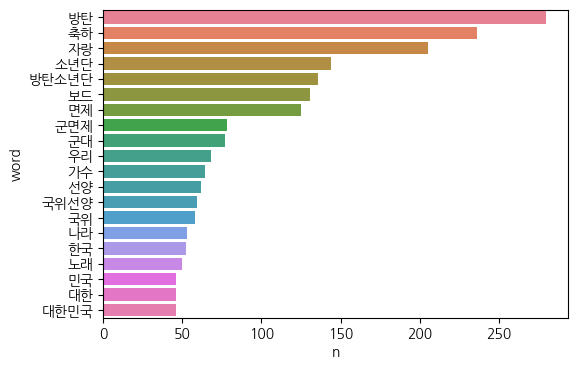

In [93]:
plt.figure(figsize = (6,4))
sns.barplot(data = top20, y = 'word', x = 'n', hue = 'word');

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
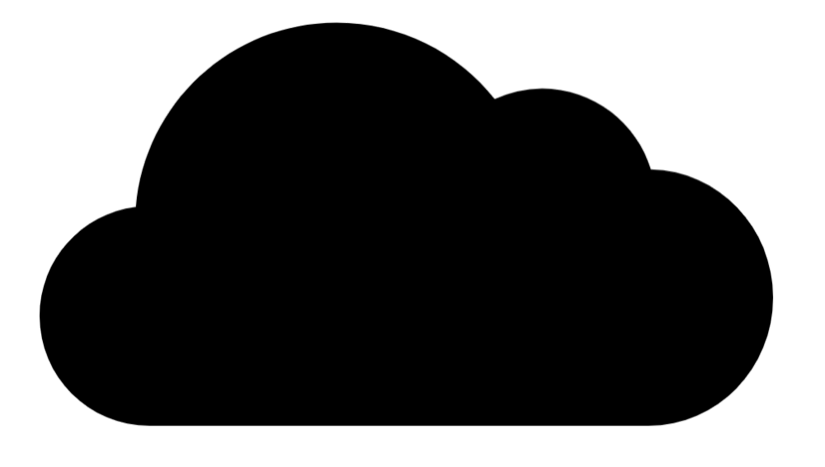

In [94]:
from PIL import Image
icon = Image.open('data/cloud.png')

img = Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)

img = np.array(img)
img

In [95]:
df_word.sample(5)

,word,n
2018,피스,1
415,단군이래,2
139,공긍횡령,1
1106,시기,30
67,거론,1


In [96]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'방탄': 280,
 '축하': 236,
 '자랑': 205,
 '소년단': 144,
 '방탄소년단': 136,
 '보드': 131,
 '면제': 125,
 '군면제': 78,
 '군대': 77,
 '우리': 68,
 '가수': 64,
 '선양': 62,
 '국위선양': 59,
 '국위': 58,
 '나라': 53,
 '한국': 52,
 '노래': 50,
 '민국': 46,
 '대한': 46,
 '대한민국': 46,
 '진짜': 43,
 '최고': 40,
 '대박': 39,
 '세계': 36,
 '아미': 35,
 '소식': 31,
 '시기': 30,
 '생각': 30,
 '사람': 29,
 '정국': 29,
 '행복': 29,
 '라니': 29,
 '역사': 28,
 '사랑': 28,
 '코로나': 27,
 '차트': 27,
 '생일': 27,
 '핫백': 26,
 '감사': 24,
 '위라니': 24,
 '우리나라': 23,
 '축하해': 23,
 '미국': 22,
 '이것': 22,
 '전세계': 22,
 '싱글': 22,
 '인정': 22,
 '그룹': 22,
 '진심': 22,
 '정도': 22,
 '노력': 21,
 '응원': 20,
 '활동': 19,
 '음악': 19,
 '요즘': 19,
 '고생': 18,
 '최초': 17,
 '아이': 17,
 '올림픽': 15,
 '너희': 15,
 '문화': 15,
 '이제': 15,
 '국민': 15,
 '때문': 15,
 '국가': 15,
 '뉴스': 15,
 '기사': 14,
 '수고': 14,
 '숟가락': 14,
 '내가': 14,
 '대통령': 14,
 '멤버': 14,
 '기분': 14,
 '시국': 13,
 '아티스트': 13,
 '이름': 13,
 '한국인': 13,
 '눈물': 13,
 '지금': 12,
 '마이트': 12,
 '아시아': 12,
 '금메달': 12,
 '댓글': 12,
 '친구': 11,
 '남자': 11,
 '국뽕': 11,
 '기록': 11,
 '싱글차트': 11,

In [102]:
wc = WordCloud(random_state = 1234, font_path = FONT_PATH,
                width = 400, height = 400, background_color = 'white',
                mask = img)


In [103]:
%config inlineBackend.figure_format = 'retina'

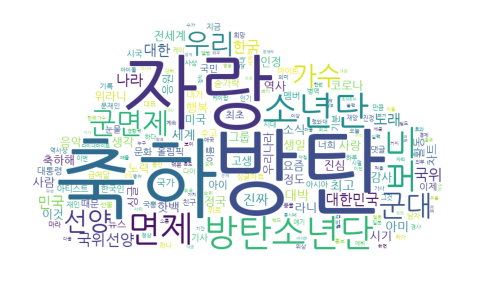

In [104]:
imgWC = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (6,4))
plt.axis('off')
plt.imshow(imgWC);

In [ ]:
#기말고사 예사아아아앙


In [105]:
#데이터프레임의 apply() 함수 설명
# 아래 내용은 ChatGPT가 생성해준 예제 코드를 기반으로 진행한 부분입니다.
import pandas as pd

df = pd.DataFrame({
    '국어': [90, 80, 70],
    '영어': [85, 75, 95],
    '수학': [100, 60, 70]
}, index=['철수', '영희', '민수'])
print(df)

    국어  영어   수학
철수  90  85  100
영희  80  75   60
민수  70  95   70


In [108]:
# axis = 0, 열 기준 평균
print(df.apply(lambda x: x.mean(), axis=0))


국어    80.000000
영어    85.000000
수학    76.666667
dtype: float64


In [109]:
# axis = 0, 행 기준 평균
df['평균'] = df.apply(lambda x: x.mean(), axis=1)
df['평균']

,평균
철수,91.666667
영희,71.666667
민수,78.333333


In [114]:
f = lambda x: x+5
df.apply(f, axis = 0)

,국어,영어,수학,평균
철수,95,90,105,96.666667
영희,85,80,65,76.666667
민수,75,100,75,83.333333


In [115]:
f = lambda x: x*5
df.apply(f, 1)

,국어,영어,수학,평균
철수,450.0,425.0,500.0,458.333333
영희,400.0,375.0,300.0,358.333333
민수,350.0,475.0,350.0,391.666667


In [113]:
f = lambda x: x /5
df.apply(f)

,국어,영어,수학,평균
철수,18.0,17.0,20.0,18.333333
영희,16.0,15.0,12.0,14.333333
민수,14.0,19.0,14.0,15.666667


In [116]:
print(df.apply(lambda x: x.max() - x.min(), axis=0))

국어    20.0
영어    20.0
수학    40.0
평균    20.0
dtype: float64


In [117]:
print(df.apply(lambda x: x.max() - x.min(), axis=1))

철수    15.0
영희    20.0
민수    25.0
dtype: float64


In [119]:
print(df.apply(lambda x: x.sum(), axis=0))

국어    240.000000
영어    255.000000
수학    230.000000
평균    241.666667
dtype: float64


In [122]:
print(df.apply(sum, axis=1))

철수    366.666667
영희    286.666667
민수    313.333333
dtype: float64


In [124]:
df.sum()

,0
국어,240.000000
영어,255.000000
수학,230.000000
평균,241.666667


In [125]:
df.sum(axis = 1)

,0
철수,366.666667
영희,286.666667
민수,313.333333


```DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs)```

| 매개변수  | 설명  |
|------------|---------------------------- |
| `func`           | 적용할 함수 (사용자 정의 함수도 가능)  |
| `axis`           | `0`이면 열(Column) 기준, `1`이면 행(Row) 기준           |
| `raw`            | `True`이면 ndarray를 전달, `False`면 Series 전달 |
| `result_type`    | `expand`, `reduce`, `broadcast` 등을 사용해 결과 모양 지정(axis=1일 때 유용) |
| `args`, `kwargs` | 함수에 추가로 전달할 인자  |


- 각 셀에 적용 시 axis 는 관계 x

In [127]:
import pandas as pd

df = pd.DataFrame({
    '이름': ['철수', '영희', '민수'],
    '취미': [['농구', '축구'], ['영화감상'], ['음악', '독서', '게임']]
})

print(df)

   이름            취미
0  철수      [농구, 축구]
1  영희        [영화감상]
2  민수  [음악, 독서, 게임]


In [128]:
df_exploded = df.explode('취미')
print(df_exploded)


   이름    취미
0  철수    농구
0  철수    축구
1  영희  영화감상
2  민수    음악
2  민수    독서
2  민수    게임


In [132]:
df = pd.DataFrame({
    '이름': ['철수', '영희'],
    '취미': [['축구', '농구'], ['영화', '음악']],
    '나이': [[20, 21], [22, 23]]
})
df

,이름,취미,나이
0,철수,"[축구, 농구]","[20, 21]"
1,영희,"[영화, 음악]","[22, 23]"


In [133]:
df.explode(['취미', '나이'])

,이름,취미,나이
0,철수,축구,20
0,철수,농구,21
1,영희,영화,22
1,영희,음악,23


In [134]:
df.explode(['이름'])

,이름,취미,나이
0,철수,"[축구, 농구]","[20, 21]"
1,영희,"[영화, 음악]","[22, 23]"


In [137]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [139]:
display_side_by_side(df, df.explode(['취미','나이']))

,이름,취미,나이
0,철수,"[축구, 농구]","[20, 21]"
1,영희,"[영화, 음악]","[22, 23]"
,이름,취미,나이
0,철수,축구,20
0,철수,농구,21
1,영희,영화,22
1,영희,음악,23


In [140]:
display_side_by_side(df, df.explode(['취미']))

,이름,취미,나이
0,철수,"[축구, 농구]","[20, 21]"
1,영희,"[영화, 음악]","[22, 23]"
,이름,취미,나이
0,철수,축구,"[20, 21]"
0,철수,농구,"[20, 21]"
1,영희,영화,"[22, 23]"
1,영희,음악,"[22, 23]"


In [141]:
display_side_by_side(df, df.explode(['나이']))

,이름,취미,나이
0,철수,"[축구, 농구]","[20, 21]"
1,영희,"[영화, 음악]","[22, 23]"
,이름,취미,나이
0,철수,"[축구, 농구]",20
0,철수,"[축구, 농구]",21
1,영희,"[영화, 음악]",22
1,영희,"[영화, 음악]",23
